# MATH 360 Worksheet 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Learning Goals

* Apply Newton's second law to construct a mathematical model of objects in motion
* Transform a higher order system of differential equations into a first order system
* Approximate solutions of first order systems of differential equations with SciPy
* Describe qualitative properties of solutions of systems of differential equations

## Prelecture Readings

* [MATH 360 > Objects in Motion](https://ubcmath.github.io/deterministic/motion/) including:
  * [Laws of Motion and Forces](http://ubcmath.github.io/deterministic/motion/laws-of-motion.html)
  * [2D Mass Spring System](http://ubcmath.github.io/deterministic/motion/laws-of-motion.html)
  * [Simple Pendulum](http://ubcmath.github.io/deterministic/motion/laws-of-motion.html)
  * [Planetary Orbits](http://ubcmath.github.io/deterministic/motion/laws-of-motion.html)
  * [Euler's 3-Body Problem](http://ubcmath.github.io/deterministic/motion/laws-of-motion.html)

## Newton's Second Law of Motion

What is **Newton's second law of motion** and how do we use it to construct mathematical models?

Give 3 examples of **forces** occuring in nature and describe the equations that model these forces.

Think of an example of an **object in motion** and then complete the first 3 steps in the mathematical modelling process:

* Write an explicit problem statement describing the system
* Identify variables and parameters
* Make assumptions and identify constraints

## Nonlinear Spring Forces

Suppose a mass is attached to a spring such that the magnitude of the force when the spring is stretched/comppressed by distance $x$ is given by

$$
F = k|x|^{\alpha}
$$

where $k$ is a spring coefficient and $\alpha > 0$.

* Find the equation of motion for the system and apply the nondimensionalization procecedure. (Assume initial conditions $x(0) = x_0$ and $x'(0) = 0$.)
* Use `scipy.integrate.odeint` to simulate the system for different exponents $\alpha$. The function `np.sign` may be helpful (see [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sign.html)).
* Describe the behaviour of the system for larger values of $\alpha$.

**Solution.** Choose $[x] = x_0$ and $[t] = \sqrt{\frac{m}{kx_0^{\alpha - 1}}}$ to get the equations

$$
\frac{d^2x^*}{dt^{*2}} = - \mathrm{sgn}(x^*) |x^*|^{\alpha} \ , \ \ x^*(0) = 1 \ , \ \ \frac{dx^*}{dt^*}(0) = 0
$$

where $\mathrm{sgn}(x^*) = 1$ if $x^*>0$, $\mathrm{sgn}(x^*) =-1$ if $x^*<0$ and $\mathrm{sgn}(x^*) = 0$ if $x^*=0$.

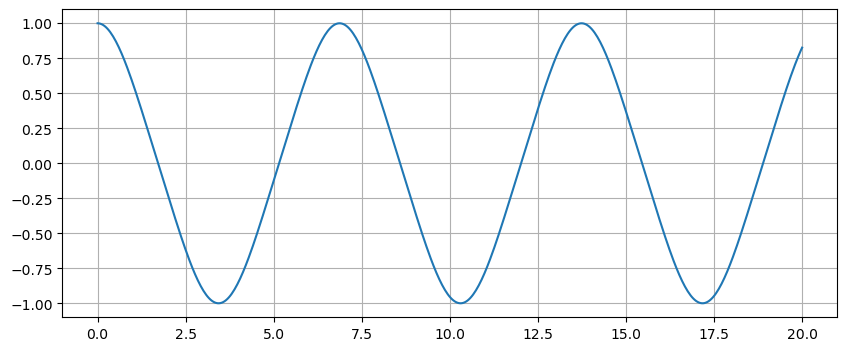

In [2]:
alpha = 2.
f = lambda u,t: np.array([u[1],-np.sign(u[0])*np.abs(u[0])**alpha])
u0 = [1.,0.]
t = np.linspace(0,20,500)
u = spi.odeint(f,u0,t)
plt.figure(figsize=(10,4))
plt.plot(t,u[:,0]), plt.grid(True)
plt.show()

## Forced Oscillations

Consider a mass spring damper system

$$
mx'' + cx' + kx = F(t)
$$

such that the forcing function is

$$
F(t) = F_0 \, \mathrm{square}(w t)
$$

where $\mathrm{square}(t)$ is the square wave with preiod $2 \pi$. In other words, $\mathrm{square}(t)$ and is given by

$$
\mathrm{square}(t) = \left\{ \begin{array}{cc} +1 & 0 < t < \pi \\ -1 & \pi < t < 2 \pi \end{array} \right.
$$

on the interval $[0,2\pi]$. See the figure below.

* Apply the nondimensionalization procecedure. (Assume initial conditions $x(0) = x_0$ and $x'(0) = 0$.)
* Use `scipy.integrate.odeint` to simulate the system.
* Describe the behaviour of the system for different values of the parameters.

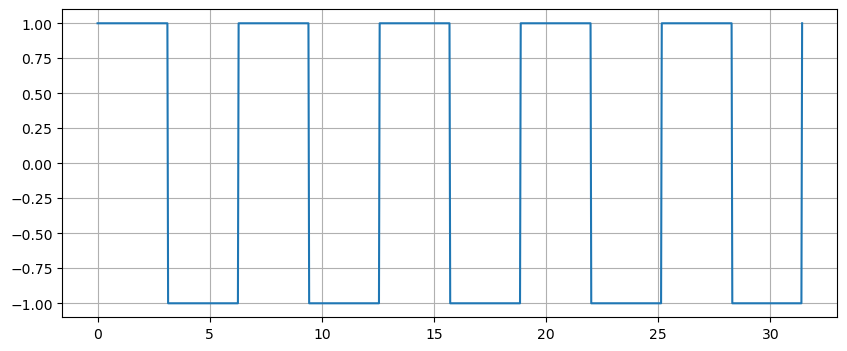

In [3]:
from scipy.signal import square

t = np.linspace(0,10*np.pi,1000)
plt.figure(figsize=(10,4))
plt.plot(t,square(t)), plt.grid(True)
plt.show()

**Solution.** Choose $[x] = F_0/k$ and $[t] = \sqrt{m/k}$ to get

$$
\frac{d^2x^*}{dt^{*2}} + \zeta \frac{dx^*}{dt^*} + x^* = \mathrm{square}(\omega t^*)
$$

where $\zeta = c/\sqrt{mk}$ and $\omega = w \sqrt{m/k}$.

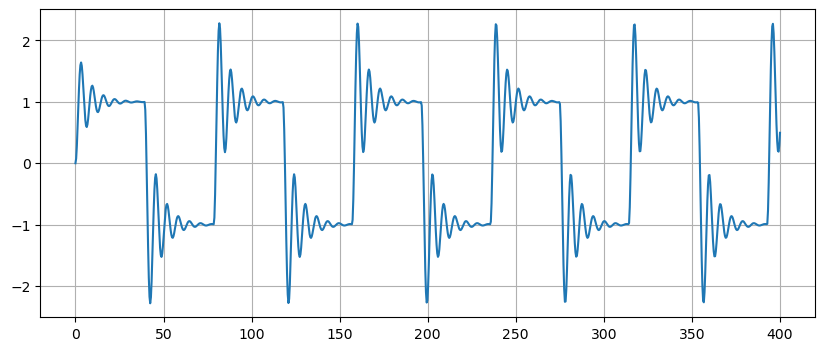

In [4]:
w = 0.08; z = 0.28;
f = lambda u,t: np.array([u[1],-z*u[1]-u[0]+square(w*t)])
t = np.linspace(0,400,1000)
u0 = [0.,0.]
u = spi.odeint(f,u0,t)
plt.figure(figsize=(10,4))
plt.plot(t,u[:,0]), plt.grid(True)
plt.show()

## 2D Mass Double Spring System

A flat object slides over a flat surface. There are two springs such that each is attached to the object at one end and fixed at the other end (see figure below). Construct a mathematical model of the motion of the object.

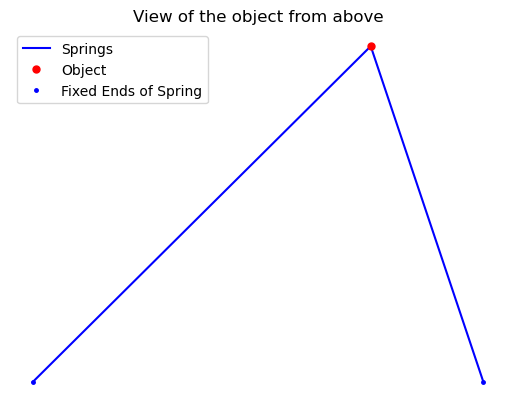

In [5]:
x = [-1,0.5,1]
y = [0,1,0]
plt.plot(x,y,'b')
plt.plot(x[1],y[1],'r.',ms=10)
plt.plot([x[0],x[2]],[y[0],y[2]],'b.',ms=5)
plt.title('View of the object from above')
plt.legend(['Springs','Object','Fixed Ends of Spring'])
plt.axis('off')
plt.show()

**Solution:**

**Variables and Parameters**

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| position of the object in $x$-direction | $x$ | L | dependent variable |
| position of the object in $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| spring constant | $k$ | MT<sup>-2</sup> | parameter |
| equilibrium length of springs | $L$ | L | parameter |
| initial position in $x$-direction | $x_0$ | L | parameter |
| initial position in $y$-direction | $y_0$ | L | parameter |
| distance from origin to fixed end of spring | $d$ | L | parameter |

**Assumptions and Constraints**

* springs are identical
* no damping or friction
* springs are fixed at position $(\pm d,0)$ in the $xy$-plane

**Construction**

The force of spring 1 is given by:

$$
F_1 = k \left( L - \sqrt{(x - d)^2 + y^2} \right) \left( \frac{x-d}{\sqrt{(x - d)^2 + y^2}} , \frac{y}{\sqrt{(x - d)^2 + y^2}} \right)
$$

and the force of spring 2 is:

$$
F_2 = k \left( L - \sqrt{(x + d)^2 + y^2} \right) \left( \frac{x + d}{\sqrt{(x + d)^2 + y^2}} , \frac{y}{\sqrt{(x + d)^2 + y^2}} \right)
$$

\begin{align*}
m \frac{d^2x}{dt^2} &= k \left( L - \sqrt{(x - d)^2 + y^2} \right)\frac{x-d}{\sqrt{(x - d)^2 + y^2}} + k \left( L - \sqrt{(x + d)^2 + y^2} \right) \left( \frac{x + d}{\sqrt{(x + d)^2 + y^2}} \right) \\
m \frac{d^2y}{dt^2} &= k \left( L - \sqrt{(x - d)^2 + y^2} \right)\frac{y}{\sqrt{(x - d)^2 + y^2}} + k \left( L - \sqrt{(x + d)^2 + y^2} \right) \left( \frac{y}{\sqrt{(x + d)^2 + y^2}} \right)
\end{align*}

Choose $[t] = \sqrt{m/k}$ and $[x]=[y]=d$ to get

\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= \left( L^* - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{x^*-1}{\sqrt{(x^* - 1)^2 + y^{*2}}} + \left( L^* - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{x^* + 1}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right) \\
\frac{d^2y^*}{dt^{*2}} &= \left( L^* - \sqrt{(x^* - 1)^2 + y^{*2}} \right)\frac{y^*}{\sqrt{(x^* - 1)^2 + y^{*2}}} + \left( L^* - \sqrt{(x^* + 1)^2 + y^{*2}} \right) \left( \frac{y^*}{\sqrt{(x^* + 1)^2 + y^{*2}}} \right)
\end{align*}

where $L^* = L/d$.

**Analysis**

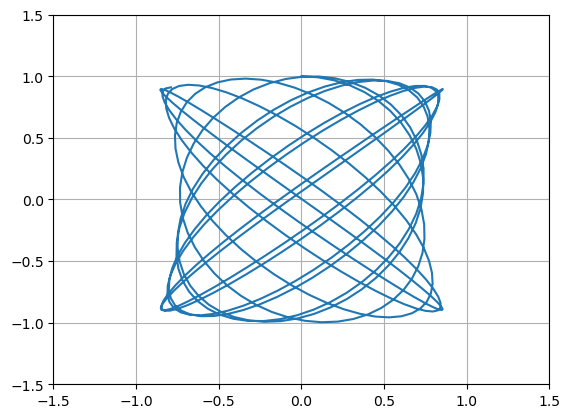

In [81]:
L = 0.25
def f(u,t):
    dudt = np.array([0.,0.,0.,0.])
    D1 = np.sqrt((u[0] - 1)**2 + u[2]**2)
    D2 = np.sqrt((u[0] + 1)**2 + u[2]**2)
    dudt[0] = u[1]
    dudt[1] = (L/D1 - 1)*(u[0] - 1) + (L/D2 - 1)*(u[0] + 1)
    dudt[2] = u[3]
    dudt[3] = (L/D1 - 1)*u[2] + (L/D2 - 1)*u[2]
    return dudt

t = np.linspace(0,50,500)
u0 = [0.,1.,1.,0.]
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,2]), plt.axis([-1.5,1.5,-1.5,1.5]), plt.grid(True)
plt.show()